# *PART 1:CLASSIFICATION*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
stroke=pd.read_csv(r"C:\Users\2031\Desktop\healthcare-dataset-stroke-data.csv")
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


***explanation about the features***
#1) id: unique identifier
#2) gender: "Male", "Female" or "Other"
#3) age: age of the patient
#4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
#5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
#6) ever_married: "No" or "Yes"
#7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
#8) Residence_type: "Rural" or "Urban"
#9) avg_glucose_level: average glucose level in blood
#10) bmi: body mass index-->>Underweight = <18.5
#>>Normal weight = 18.5–24.9
#>>Overweight = 25–29.9
#>>Obesity = BMI of 30 or greater
#11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
#12) stroke: 1 if the patient had a stroke or 0 if not
#*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [3]:
stroke.shape

(5110, 12)

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **cheking if there is missing data**

In [6]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*as you can see there is 201 values missing in "bmi"*

In [7]:
unavailable_data=round(((stroke.isnull().sum()/stroke.isnull().count()*100)))

In [8]:
unavailable_data

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  4.0
smoking_status       0.0
stroke               0.0
dtype: float64

*4% of data in bmi column is missing*

# so i decided to fill the missing values in bmi with the average value

In [9]:
zero_nan=["bmi"]

In [10]:
for column in zero_nan:
    stroke[column]= stroke[column].replace(np.nan,0)
    mean=int( stroke[column].mean(skipna=True))
    stroke[column]= stroke[column].replace(0,mean)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014A3D06BD90>,
      dtype=object)

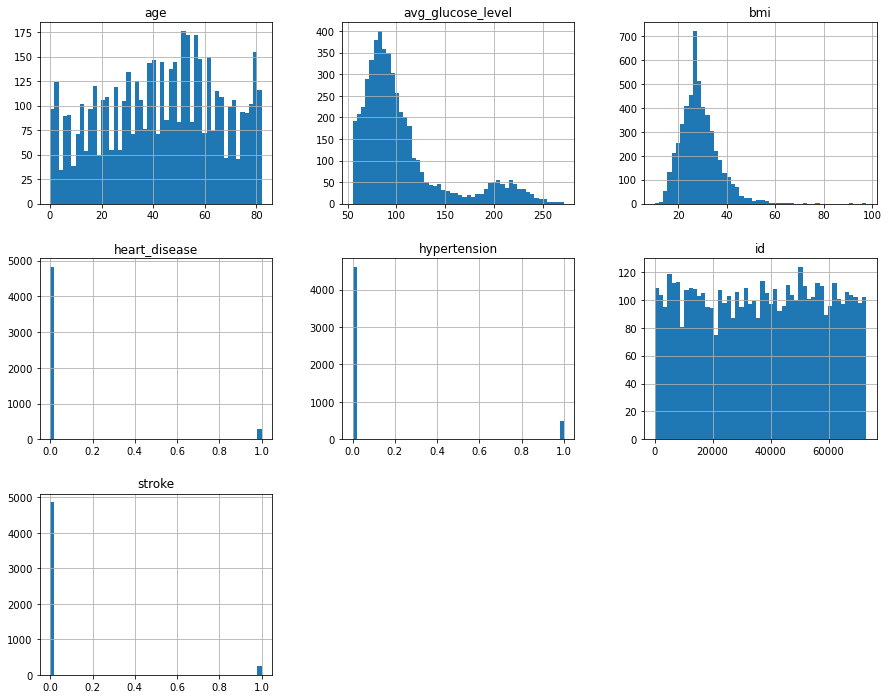

In [11]:
stroke.hist(bins=50, figsize=(15, 12))

*#grafs to help us to understand the dataset better*

In [23]:
stroke.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.032157
id                   0.006388
Name: stroke, dtype: float64

*#showing wich element affect having a stroke the most*

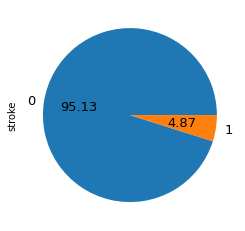

In [12]:
stroke.groupby(['stroke'])['stroke'].aggregate(lambda x: x.count()/ 5110).plot(kind='pie',autopct='%.2f',fontsize=13);

*as we can see just 5% of the people had a stroke*

In [13]:
def grouped_graph(column, labels):
    group = stroke.groupby([column], as_index=False)
    group_count = group.count()['stroke']
    group_sum = group.sum()['stroke']
    group_percentage = group_sum / group_count * 100

    group_percentage
    
    plt.bar(x=range(0, len(labels)), height=group_percentage, tick_label=labels)
    plt.title("{} vs Stroke Risk".format(column))
    plt.xlabel("{}".format(column))
    plt.ylabel("Stoke Risk %")
    plt.show()

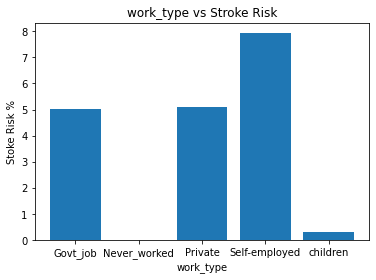

In [14]:
group = stroke.groupby(['work_type'], as_index=False).sum()
labels = ['Govt_job','Never_worked', 'Private', 'Self-employed', 'children']
grouped_graph('work_type', labels)

*#self-employed have the maggior stroke risk while those who never worked don't have any risk to have a stroke*

# split the people for bmi value,to have a look how it affect a risk to have a stroke

#Underweight  <18.5
#Normal weight = 18.5–24.9
#Overweight = 25–29.9

In [15]:

Underweight=stroke.loc[stroke.stroke<18.5]
print(Underweight['stroke'].value_counts())
print(Underweight['stroke'].mean())

0    4861
1     249
Name: stroke, dtype: int64
0.0487279843444227


In [16]:
index=stroke.loc[stroke.bmi>18.5]
Normal_weight=index.loc[index.bmi<29.9]
print(Normal_weight['stroke'].value_counts())
print(Normal_weight['stroke'].mean())

0    2668
1     147
Name: stroke, dtype: int64
0.0522202486678508


In [17]:
Overweight=stroke.loc[stroke.bmi>29.9]
print(Overweight['stroke'].value_counts())
print(Overweight['stroke'].mean())

0    1822
1      98
Name: stroke, dtype: int64
0.051041666666666666


we can see that in all the groups the percentage of who had a stroke is very low and those that belong to group "underweight" and had a stroke are more than the other groups


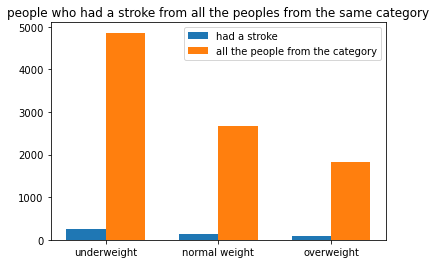

In [18]:
labels = ['underweight','normal weight','overweight']
had_stroke = [249, 147, 98]
stroke_means = [4861,2668,1822]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, had_stroke, width, label='had a stroke')
rects2 = ax.bar(x + width/2, stroke_means, width, label='all the people from the category')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('people who had a stroke from all the peoples from the same category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
print('we can see that in all the groups the percentage of who had a stroke is very low',
      'and those that belong to group "underweight" and had a stroke are more than the other groups')

# explanation about the glucose average in the blood


#Normal blood sugar levels are less than 100 mg/dL after not eating (fasting) for at least eight hours.
#And they're less than 140 mg/dL two hours after eating.
#During the day, levels tend to be at their lowest just before meals. 
#For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL. 
#For some people, 60 is normal; for others, 90 is the norm.

In [19]:
stroke["avg_glucose_level"].value_counts()

93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02     1
Name: avg_glucose_level, Length: 3979, dtype: int64

# spliting the data by glucose average

In [52]:
low_glucose_avg=stroke.loc[stroke.avg_glucose_level<70]
low_glucose_avg['stroke'].value_counts()

0    727
1     27
Name: stroke, dtype: int64

In [53]:
index=stroke.loc[stroke.avg_glucose_level>69]
normal_glucose_avg=index.loc[index.avg_glucose_level<90]
normal_glucose_avg['stroke'].value_counts()

0    1657
1      61
Name: stroke, dtype: int64

In [54]:
high_glucose_avg=stroke.loc[stroke.avg_glucose_level>89]
high_glucose_avg['stroke'].value_counts()

0    2623
1     164
Name: stroke, dtype: int64

In [55]:
import plotly.graph_objects as go

labels = ['low_glucose_avg','normal_glucose_avg','high_glucose_avg']
values = [727,1657,2623]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

#most people have a high gucose average

In [47]:
labels = ['who had low glucose_avg and had a stroke','who had low glucose_avg and had not a stroke']
values = [27,727]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [48]:
labels = ['who had normal glucose_avg and had a stroke','who had normal glucose_avg and had not a stroke']
values = [61,1657]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [49]:
labels = ['who had high glucose_avg and had a stroke','who had high glucose_avg and had not a stroke']
values = [164,2623]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

 *#as we saw from the pie charts:people who have a high glucose average are most likley to have a stroke*

# now lets chek how age affect the probability to have a stroke

In [42]:
group1=stroke.loc[stroke.age<25]
group1['stroke'].value_counts()

0    1234
1       2
Name: stroke, dtype: int64

In [43]:
group11=stroke.loc[stroke.age>25]
group2=group11.loc[group11.age<45]
group2['stroke'].value_counts()

0    1232
1       8
Name: stroke, dtype: int64

In [44]:
group3=stroke.loc[stroke.age>45]
group3['stroke'].value_counts()

0    2256
1     236
Name: stroke, dtype: int64

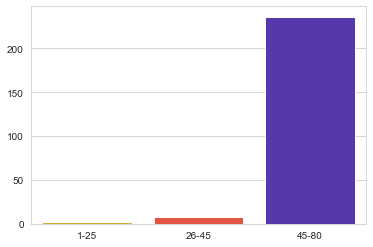

In [57]:
sns.set_style("whitegrid")
sns.barplot(["1-25",'26-45','45-80'],
            y=[2,8,236],
            palette="CMRmap_r"
           )
#we can see that people older than 45 are more likley to have a stroke

#*#as we all imagend getting older increase the risk of having stroke*

# I thought that the type of residence may have a huge effect on the risk of having stroke so i decided to exam the data and see if it does really affect having a stroke

In [58]:
r=stroke.loc[stroke.Residence_type=='Rural']
print(r['stroke'].value_counts())
print(114/2400)

0    2400
1     114
Name: stroke, dtype: int64
0.0475


In [59]:
j=r=stroke.loc[stroke.Residence_type=='Urban']
print(j['stroke'].value_counts())
print(135/2461)

0    2461
1     135
Name: stroke, dtype: int64
0.054855749695245835


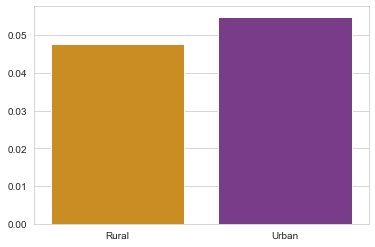

In [60]:
sns.set_style("whitegrid")
sns.barplot(["Rural",'Urban'],
            y=[0.0475,0.054855749695245835],
            palette="CMRmap_r"
           )

*# apparently the type of residence does not have a big effect on having stroke:because as i see the risk of having a stroke in the two types of residence is so close* 

# now lets the effect of  the smoking statuse 

In [61]:
stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [62]:
formerly_smoked=stroke.loc[stroke.smoking_status=='formerly smoked']
formerly_smoked['stroke'].value_counts()

0    815
1     70
Name: stroke, dtype: int64

In [63]:
smokes=stroke.loc[stroke.smoking_status=='smokes']
smokes['stroke'].value_counts()

0    747
1     42
Name: stroke, dtype: int64

In [64]:
never_smoked=stroke.loc[stroke.smoking_status=='never smoke']
never_smoked['stroke'].value_counts()

Series([], Name: stroke, dtype: int64)

Text(0.5, 0.98, 'how smokes effect having stroke')

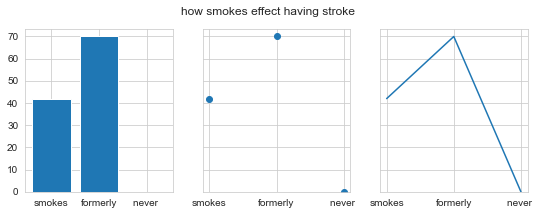

In [59]:

data = {'smokes': 42, 'formerly': 70, 'never ': 0}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('how smokes effect having stroke')

*# the people who never smoked in their life decrease the risk of having a stroke,as we can see from our data no one of those who never smoked had a stroke*

# so lets see what affect having a stroke the most

In [61]:
df122=stroke.drop(['id'], axis=1)

*#first i deleted the id column,beacuse it may give as a wrong analyzation*

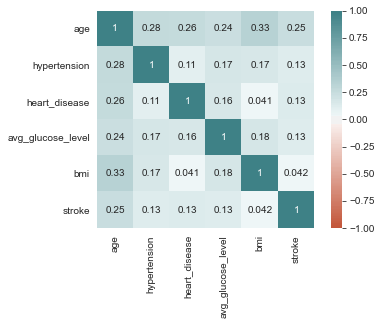

In [62]:
corr = df122.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
            square=True,annot=True)
plt.show()

*#the age have the most effect on having a sroke,having hypertension,heart disease and high glucose average increase the risk of having a stroke*

# PART 2:PREDICTION

# first i have to convert all the data to numerical data

In [72]:
pre_df=stroke.drop(['id'], axis=1)

In [73]:
for label, content in pre_df.items():
    if pd.api.types.is_string_dtype(content):
        pre_df[label] = content.astype("category").cat.as_ordered()

#cheking if there is value

In [74]:
for label, content in pre_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

gender
ever_married
work_type
Residence_type
smoking_status


*# after seeing that:'gender','ever_married','work_type','residence_type','smoking_status' are categorial type of data,now i have to convert the values of data to numerical type*

In [76]:
for label, content in pre_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        pre_df[label] = pd.Categorical(content).codes+1 

In [77]:
pre_df.shape

(5110, 11)

# after cleaning the data,now must split the data into training and testing sets

In [ ]:
x=pre_df.iloc[:,:10]
y=pre_df.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

*#The above script splits the dataset into 70% train data and 30% test data*

In [88]:
pre_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

*# we can see we are dealing with imbalanced data set, if we go ahead with that there is a high possibility that it Knn algorithm will predict no stroke for all data. So we need to make the data more balanced*

In [101]:
class_count_0, class_count_1 = pre_df['stroke'].value_counts()
class_0 = pre_df[pre_df['stroke'] == 0]
class_1 = pre_df[pre_df['stroke'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4861, 11)
class 1: (249, 11)


*#there is many ways to handle imbalancend data set:undersampling and oversampling are some of the ways*

# undersampling

total class of 1 and0: 1    249
0    249
Name: stroke, dtype: int64


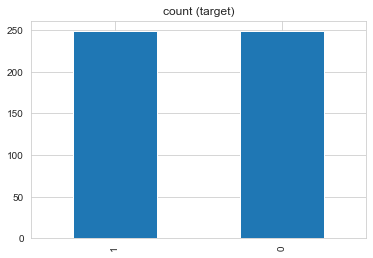

In [214]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and0:",test_under['stroke'].value_counts())
test_under['stroke'].value_counts().plot(kind='bar', title='count (target)')

# oversampling

total class of 1 and 0: 1    249
0    249
Name: stroke, dtype: int64


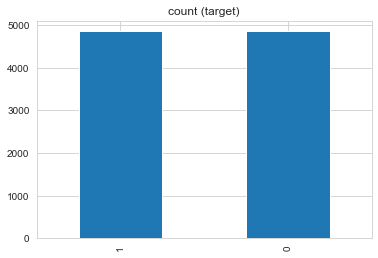

In [154]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)
print("total class of 1 and 0:",test_under['stroke'].value_counts())
test_over['stroke'].value_counts().plot(kind='bar', title='count (target)')

# applying the models

# KNN

In [82]:
knn = KNeighborsClassifier(n_neighbors = 5) # We'll use the default number of neighbors.
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)
print('K=5 accuracy score: ',knn.score(X_test,y_test))

K=5 accuracy score:  0.9465101108936725


*#first lets chek what is the better K to choose*

Text(0, 0.5, 'Accuracy')

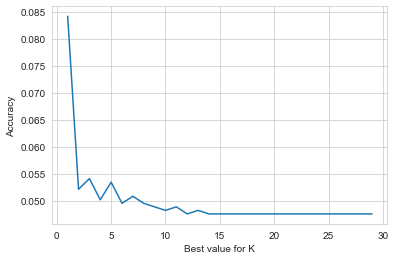

In [81]:
err_rate=[] 
for i in range(1,30):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    bestK=k.predict(X_test)
    err_rate.append(np.mean(bestK != y_test))

plt.plot(range(1,30),err_rate)
plt.xlabel('Best value for K')
plt.ylabel('Accuracy')

# a closer look

Text(0, 0.5, 'Accuracy')

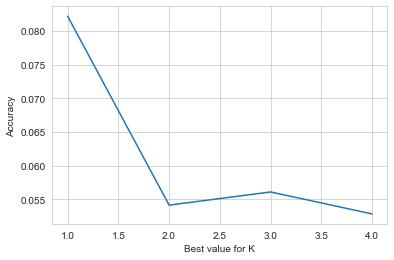

In [265]:
err_rate=[] 
for i in range(1,5):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    bestK=k.predict(X_test)
    err_rate.append(np.mean(bestK != y_test))

plt.plot(range(1,5),err_rate)
plt.xlabel('Best value for K')
plt.ylabel('Accuracy')

*#as we see the better K to choose is 3*

In [180]:
len(y)

5110

In [181]:
classifier=KNeighborsClassifier(n_neighbors=3)

apllying K to be 3

In [182]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [183]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [184]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1463,    8],
       [  61,    1]], dtype=int64)

In [185]:
from sklearn.metrics import f1_score,accuracy_score
f1_score(y_test,y_pred)

0.028169014084507043

In [186]:
accuracy_score(y_test,y_pred)

0.9549902152641878

*#as we can see the accuracy is 0.954 and we are getting very high accuracy because it is predicting mostly the majority class that is 0 (Non-fraudulent)*

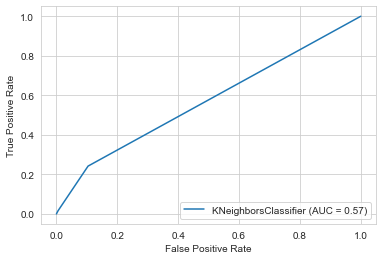

In [187]:
metrics.plot_roc_curve(classifier, X_test, y_test)  
plt.show()

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1471
           1       0.11      0.02      0.03        62

    accuracy                           0.95      1533
   macro avg       0.54      0.51      0.50      1533
weighted avg       0.93      0.95      0.94      1533



# so now lets aplly the model on the balancend dataset

In [215]:
x1=test_under.iloc[:,:10]
y1=test_under.iloc[:,10]
x_train, x_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.3)

In [216]:
knn = KNeighborsClassifier(n_neighbors = 5) # We'll use the default number of neighbors.
knn.fit(x_train,Y_train)
predicted_Y = knn.predict(x_test)
print('K=5 accuracy score: ',knn.score(x_test,Y_test))

K=5 accuracy score:  0.6866666666666666


# choosing the ideal K

Text(0, 0.5, 'Accuracy')

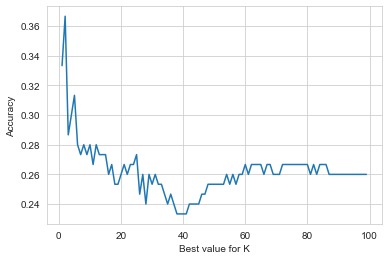

In [303]:
err_rate=[] 
for i in range(1,100):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train,Y_train)
    bestK=k.predict(x_test)
    err_rate.append(np.mean(bestK != Y_test))

plt.plot(range(1,100),err_rate)
plt.xlabel('Best value for K')
plt.ylabel('Accuracy')

# a clooser look

Text(0, 0.5, 'Mean Error')

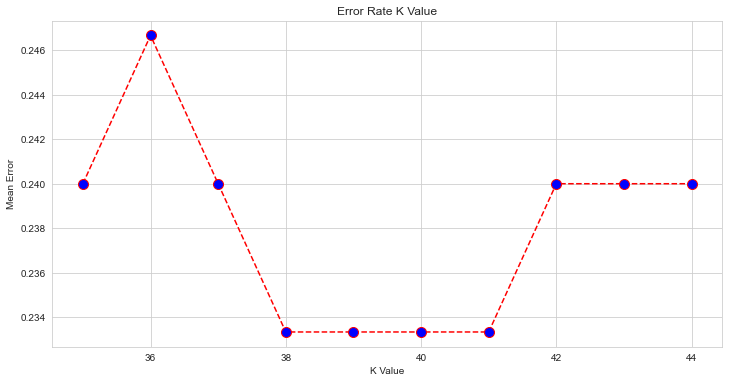

In [304]:
err_rate=[] 
for i in range(35,45):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train,Y_train)
    bestK=k.predict(x_test)
    err_rate.append(np.mean(bestK != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(35, 45), err_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [305]:
classifier=KNeighborsClassifier(n_neighbors=39)

#*i chose the K to be 39*

In [306]:
classifier.fit(x_train,Y_train)

KNeighborsClassifier(n_neighbors=39)

In [307]:
Y_pred=classifier.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [308]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[29, 43],
       [38, 40]], dtype=int64)

In [309]:
from sklearn.metrics import f1_score,accuracy_score
f1_score(Y_test,Y_pred)

0.4968944099378882

In [310]:
accuracy_score(Y_test,Y_pred)

0.46

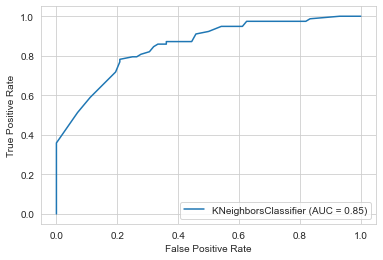

In [311]:
metrics.plot_roc_curve(classifier, x_test, Y_test)  
plt.show()

In [285]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.44      0.39      0.41        72
           1       0.49      0.54      0.51        78

    accuracy                           0.47       150
   macro avg       0.46      0.46      0.46       150
weighted avg       0.46      0.47      0.46       150



*#The results show that our KNN algorithm was able to classify all the 160 with 47% accuracy*

# Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score

**#now lets aplly the decision tree classifier on the balanced data and see the result**

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        72
           1       0.71      0.77      0.74        78

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150

accuracy: 0.72
confusion_matrix: [[48 24]
 [18 60]]
precision =  0.7142857142857143 
 recall =  0.7692307692307693


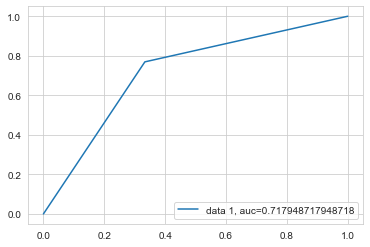

In [316]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,Y_train)

pred = dtree.predict(x_test)
print(classification_report(Y_test,pred))
print ('accuracy:',accuracy_score(Y_test,pred))
print ('confusion_matrix:',confusion_matrix(Y_test,pred))
precision = precision_score(Y_test,pred)
recall = recall_score(Y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

Y_pred_proba = dtree.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  Y_pred_proba)
auc = roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



**#as we can see Decision Tree Classifier gave as better results:1) the accuracy is higher                                                          2)the precision also higher**

# lets sort the features by the most effective one on having a stroke

In [315]:
impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=pre_df.loc[:,pre_df.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

                   Importance
age                  0.478053
bmi                  0.190670
avg_glucose_level    0.157139
gender               0.038709
smoking_status       0.034527
ever_married         0.033239
work_type            0.029385
heart_disease        0.023266
Residence_type       0.015011
hypertension         0.000000


# Regression

In [318]:
houses_Brazil=pd.read_csv(r"C:\Users\2031\Desktop\houses_to_rent_v2.csv")
houses_Brazil

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# *#fundamental information about the data*

In [319]:
houses_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [320]:
houses_Brazil.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


# cleaning the data

In [334]:
houses_Brazil.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [332]:
houses_Brazil['floor'] =houses_Brazil['floor'].apply(lambda x: -1 if x == '-' else x).astype(int)

*#there is some unknown values in "floor" column that filled with '-'.*

# converting to numerical data

In [335]:
for label, content in houses_Brazil.items():
    if pd.api.types.is_string_dtype(content):
        pre_df[label] = content.astype("category").cat.as_ordered()

In [336]:
for label, content in houses_Brazil.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

city
animal
furniture


*#so the features:'city','animal','furniture' are categorial data that we must convert to numerical data*

In [338]:
for label, content in houses_Brazil.items():
    if not pd.api.types.is_numeric_dtype(content):
        houses_Brazil[label] = pd.Categorical(content).codes+1 

# seeing what's increase the rent amount the most

In [339]:
houses_Brazil.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)       1.000000
fire insurance (R$)    0.987343
bathroom               0.668504
parking spaces         0.578361
rooms                  0.541758
total (R$)             0.264490
city                   0.188571
area                   0.180742
property tax (R$)      0.107884
floor                  0.059903
hoa (R$)               0.036490
animal                -0.067754
furniture             -0.164235
Name: rent amount (R$), dtype: float64

*#the fire insurance is the most importante feature in this data(affect the most)*

# first lets see from which cities in brazil the data is taken

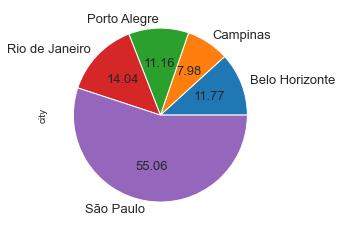

In [326]:
houses_Brazil.groupby(['city'])['city'].aggregate(lambda x: x.count()/ 10692).plot(kind='pie',
                                                                autopct='%.2f',fontsize=13);

# ploting to understand the fire insurance effect better

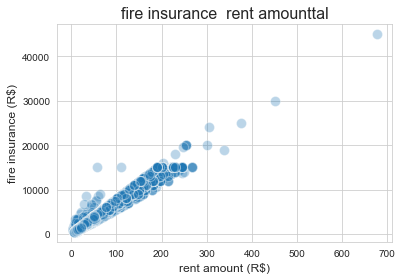

In [345]:
plt.scatter(x ='fire insurance (R$)', y = 'rent amount (R$)', data =houses_Brazil , s = 100, alpha = 0.3, edgecolor = 'white');
plt.title('fire insurance  rent amounttal', fontsize = 16);
plt.ylabel('fire insurance (R$)', fontsize = 12);
plt.xlabel('rent amount (R$)', fontsize = 12);

# Correlation is a statistic that measures the degree to which two variables move in relation to each other.

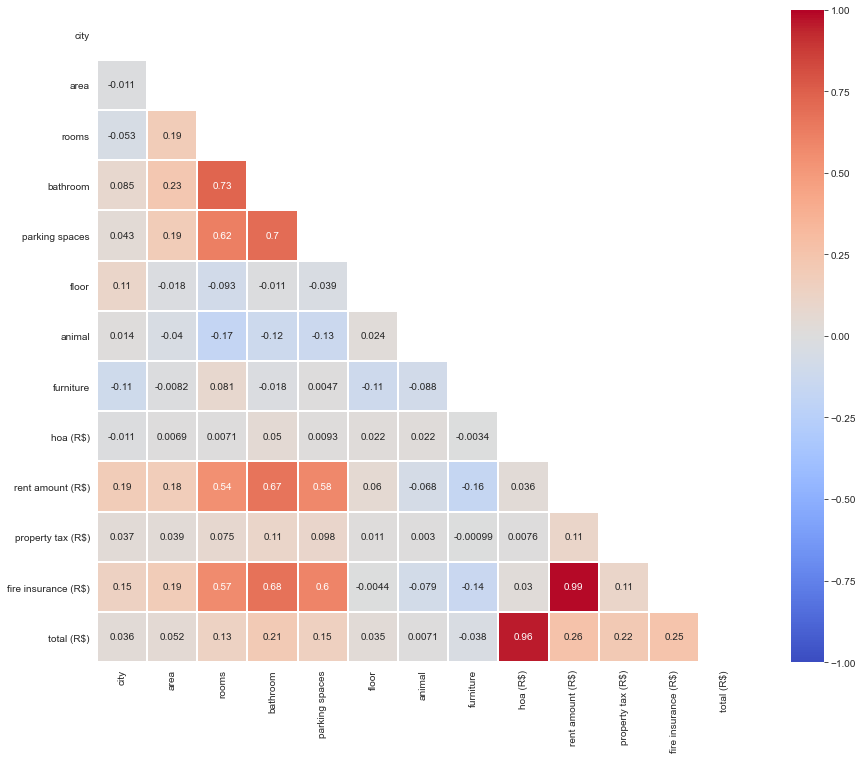

In [358]:
correlation = houses_Brazil.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_02, cmap="coolwarm", center=0, annot=True,vmin=-1, vmax=1,linewidth=1, linecolor='w', square=True,mask= np.triu(correlation));

# spliting the data

In [346]:
x=houses_Brazil.iloc[:,:12]
y=houses_Brazil.iloc[:,12]

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                    random_state = 0)

In [348]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [349]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9999999692748449

In [365]:
from sklearn.metrics import mean_absolute_error
prediction = regressor.predict(X_test)
print("mean absolute error of the model: ", mean_absolute_error(y_pred, y_test))

mean absolute error of the model:  0.5952631068502496


**#The score for the regression model is high(with the value of 0.99) and the MAE for the model is low(with the value of 0.59)**

In [362]:
x =houses_Brazil["rooms"].values.reshape(-1,1)
y = houses_Brazil["rent amount (R$)"].values.reshape(-1,1)

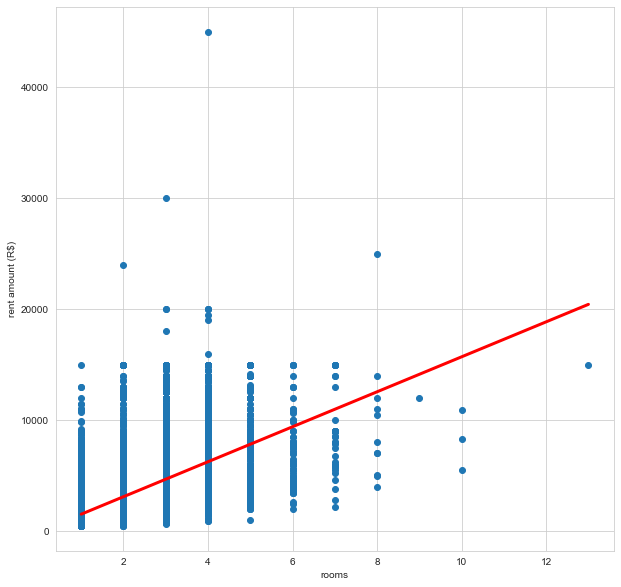

R^2 Score: 0.2935013030525405


In [366]:

linear_regression_model = LinearRegression()
linear_regression_model.fit(x,y)

# Prediction
x_space = np.linspace(min(x), max(x)).reshape(-1,1)
predicted_y = linear_regression_model.predict(x_space)

# Plotting regression line and scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.plot(x_space, predicted_y, color="red", linewidth=3)
plt.xlabel("rooms")
plt.ylabel("rent amount (R$)")
plt.show()

# R^2 Score 
print("R^2 Score: {}".format(linear_regression_model.score(x,y)))

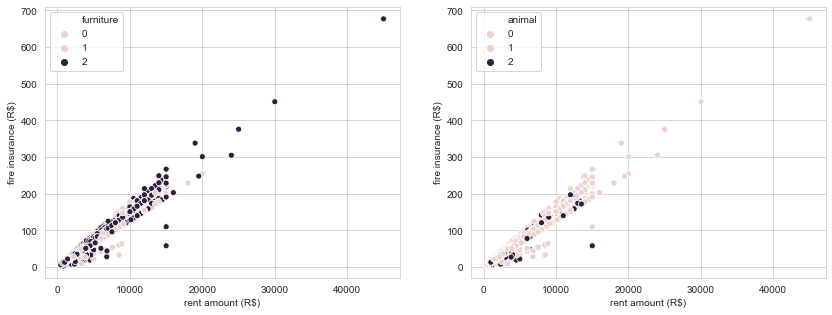

In [367]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(data=houses_Brazil, y='fire insurance (R$)', x='rent amount (R$)', 
                hue="furniture", ax=axes[0]);
sns.scatterplot(data=houses_Brazil, y='fire insurance (R$)', x='rent amount (R$)',
                hue="animal", ax=axes[1]);

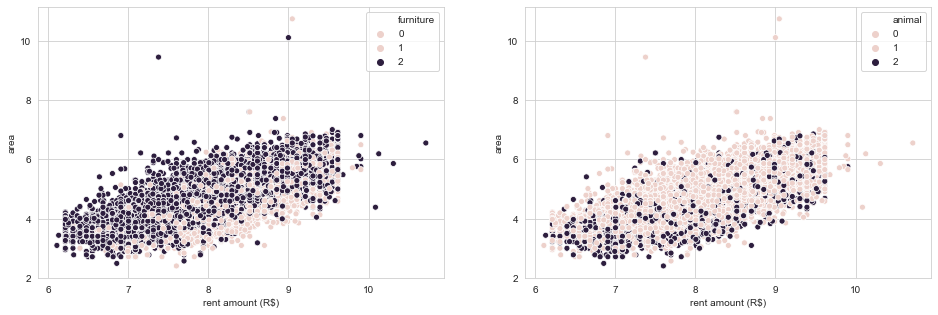

In [368]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.scatterplot(data=houses_Brazil, y=np.log(houses_Brazil['area']), x=np.log(houses_Brazil['rent amount (R$)']), 
                hue="furniture", ax=axes[0]);
sns.scatterplot(data=houses_Brazil, y=np.log(houses_Brazil['area']), x=np.log(houses_Brazil['rent amount (R$)']), 
                hue="animal", ax=axes[1]);


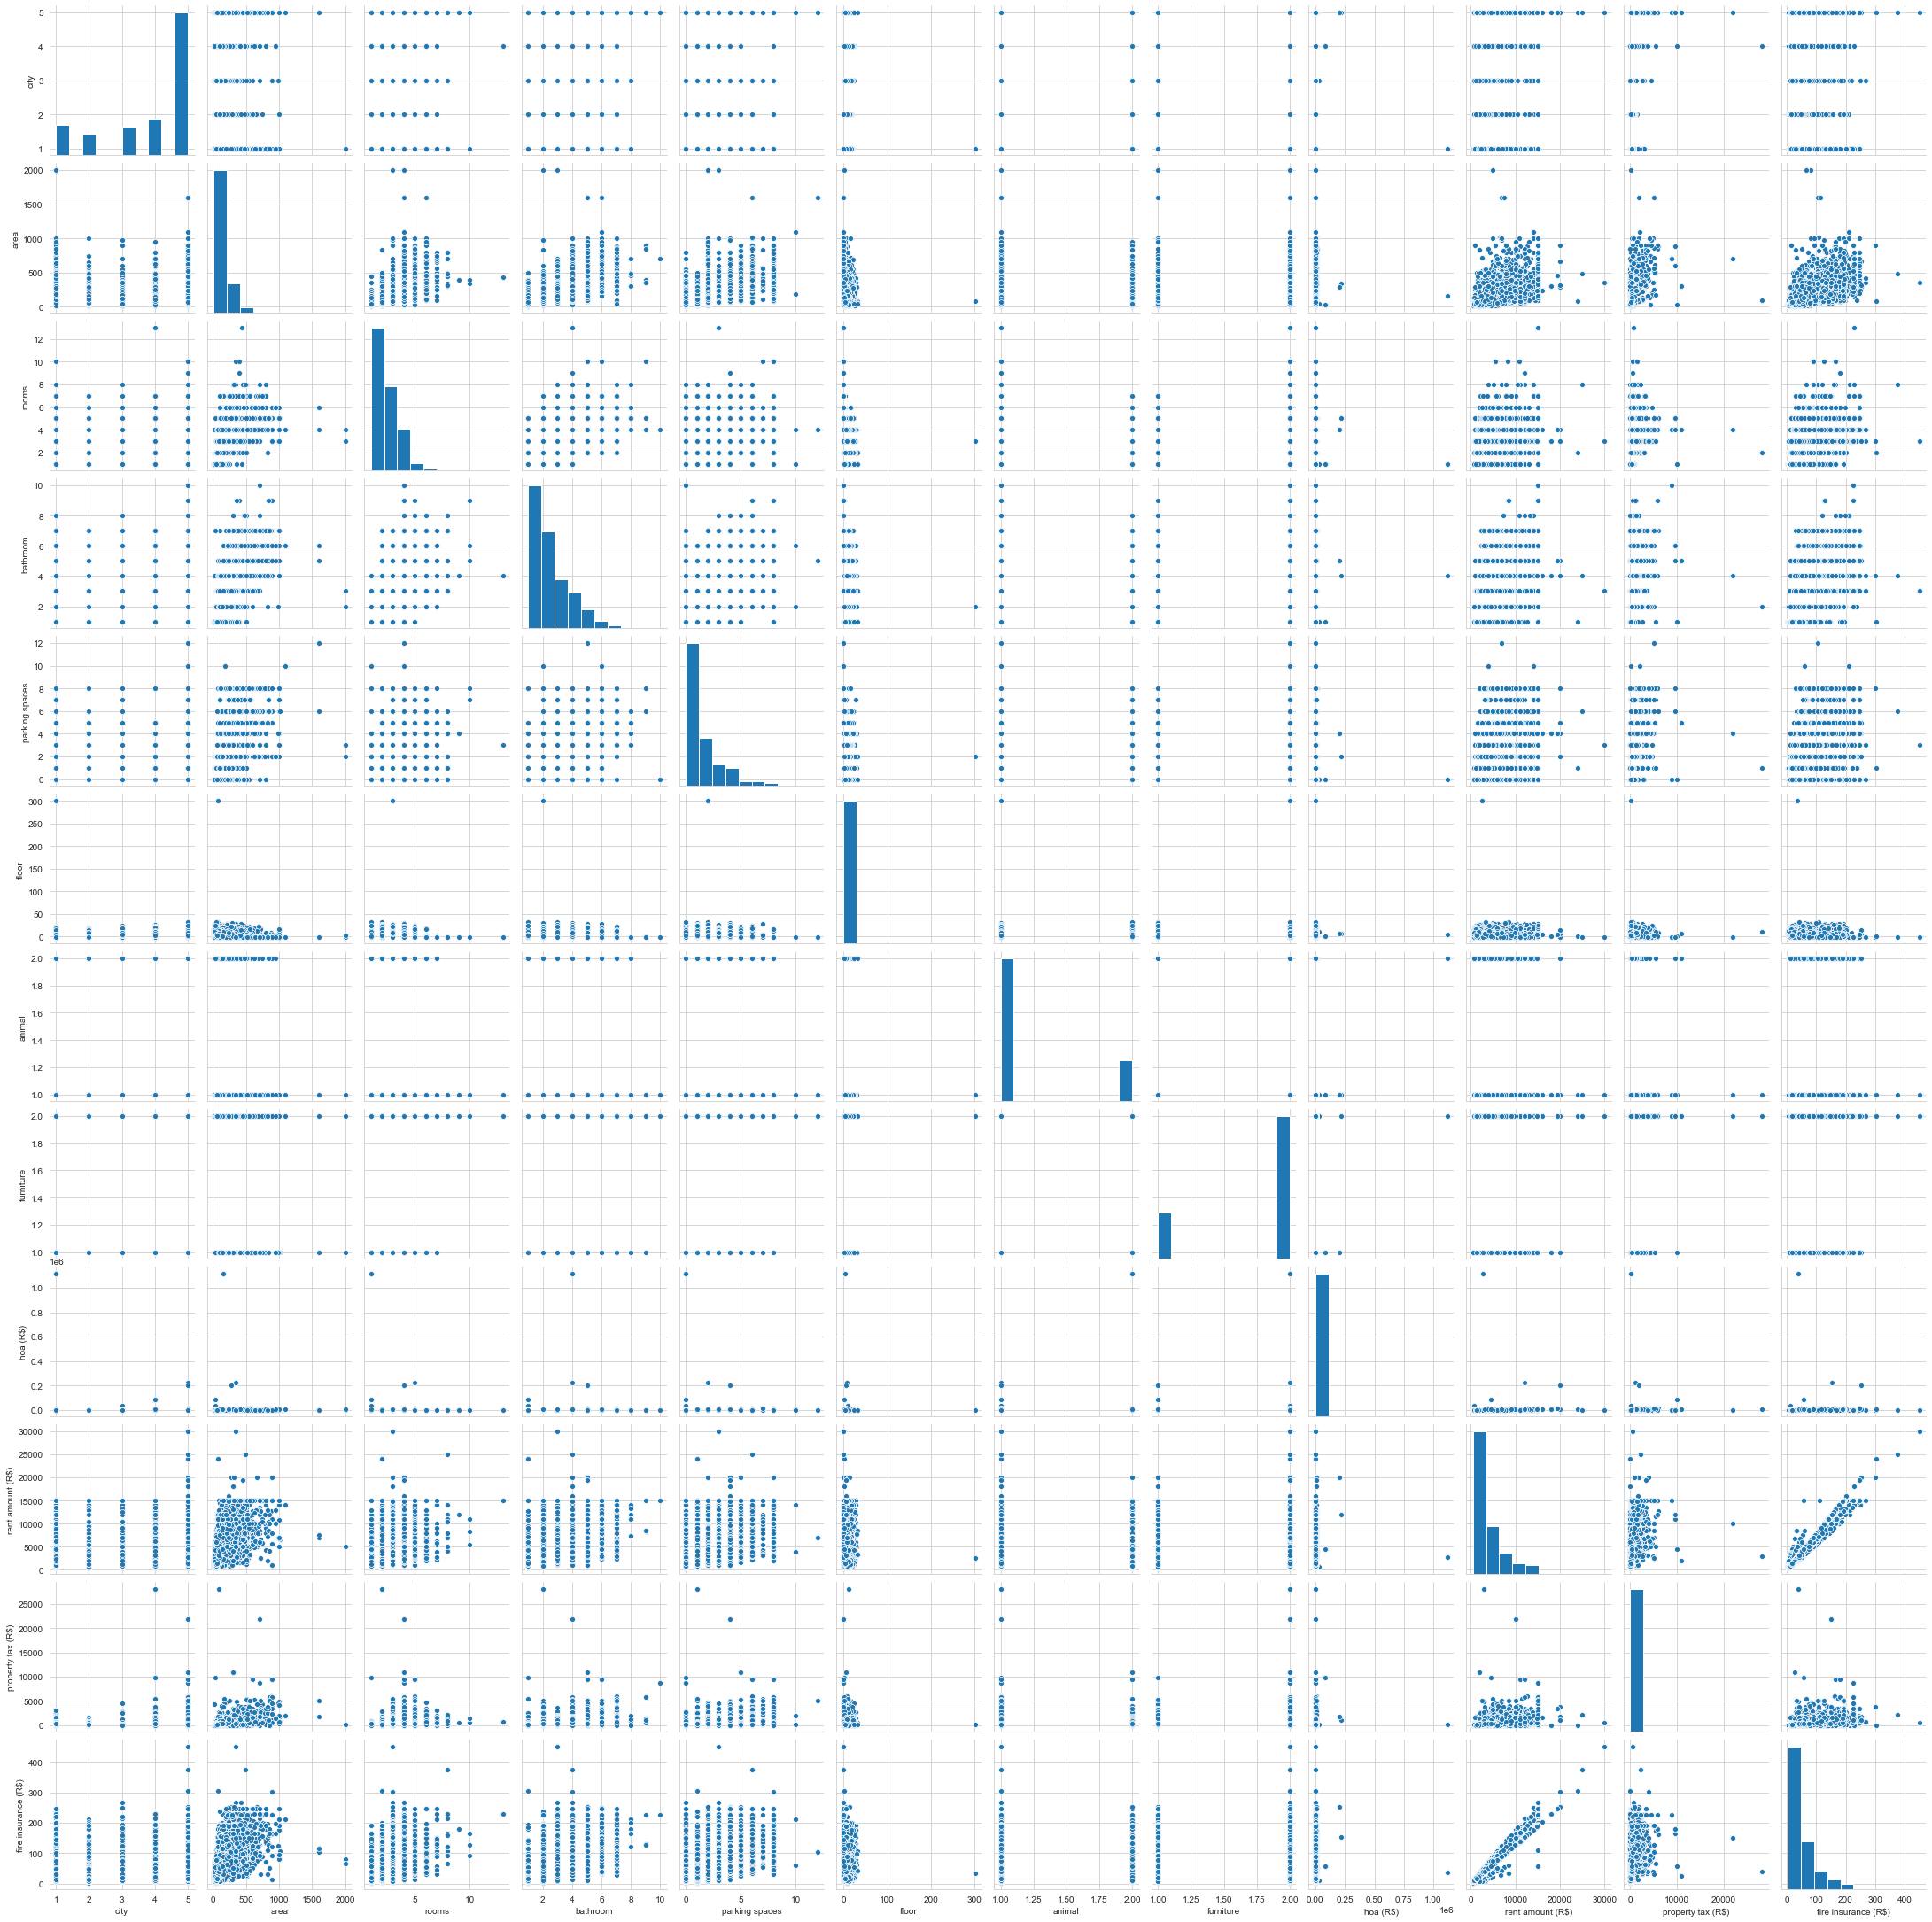

In [369]:
sns.pairplot(X_train);